In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('data.xlsx')

In [3]:
data.head()

,SUBSCRIBER_ID,BNUM_OUT,BNUM_IN,CHURN,PROD_CNT_MACRO,REV_BUN_MAC,REV_OUT,USAGE_OUT_INT_DUR,USAGE_OUT_OFFNET_DUR,USAGE_OUT_ONNET_DUR,LNE_TENURE,TOPUP_AMT,TOPUP_CNT,Segment
0,1,2.0,3.0,1,NaN,NaN,0.0,0.0,2.0,1.0,163,NaN,NaN,Segment 1
1,2,52.0,32.0,0,3.0,2.0,1.0,0.0,0.0,966.0,76,2.0,3.0,Segment 2
2,3,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,118,NaN,0.0,Segment 3
3,4,4.0,5.0,1,NaN,NaN,3.0,0.0,5.0,5.0,107,4.0,2.0,Segment 1
4,5,0.0,14.0,0,0.0,NaN,0.0,0.0,0.0,0.0,149,6.0,2.0,Segment 5


In [4]:
# quick info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SUBSCRIBER_ID         5000 non-null   int64  
 1   BNUM_OUT              4512 non-null   float64
 2   BNUM_IN               4512 non-null   float64
 3   CHURN                 5000 non-null   int64  
 4   PROD_CNT_MACRO        2175 non-null   float64
 5   REV_BUN_MAC           1023 non-null   float64
 6   REV_OUT               4492 non-null   float64
 7   USAGE_OUT_INT_DUR     4599 non-null   float64
 8   USAGE_OUT_OFFNET_DUR  4599 non-null   float64
 9   USAGE_OUT_ONNET_DUR   4599 non-null   float64
 10  LNE_TENURE            5000 non-null   int64  
 11  TOPUP_AMT             2737 non-null   float64
 12  TOPUP_CNT             3091 non-null   float64
 13  Segment               4998 non-null   object 
dtypes: float64(10), int64(3), object(1)
memory usage: 547.0+ KB


In [5]:
# checking for data types
data.dtypes

SUBSCRIBER_ID             int64
BNUM_OUT                float64
BNUM_IN                 float64
CHURN                     int64
PROD_CNT_MACRO          float64
REV_BUN_MAC             float64
REV_OUT                 float64
USAGE_OUT_INT_DUR       float64
USAGE_OUT_OFFNET_DUR    float64
USAGE_OUT_ONNET_DUR     float64
LNE_TENURE                int64
TOPUP_AMT               float64
TOPUP_CNT               float64
Segment                  object
dtype: object

In [6]:
# basic statistical information
data.describe()

,SUBSCRIBER_ID,BNUM_OUT,BNUM_IN,CHURN,PROD_CNT_MACRO,REV_BUN_MAC,REV_OUT,USAGE_OUT_INT_DUR,USAGE_OUT_OFFNET_DUR,USAGE_OUT_ONNET_DUR,LNE_TENURE,TOPUP_AMT,TOPUP_CNT
count,5000.000000,4512.000000,4512.000000,5000.000000,2175.000000,1023.000000,4492.000000,4599.000000,4599.000000,4599.000000,5000.000000,2737.000000,3091.000000
mean,2500.500000,9.847961,14.552527,0.217400,1.163678,3.654936,2.484862,0.921505,7.699935,79.876236,120.761000,6.536719,2.422193
std,1443.520003,13.768099,18.200048,0.412518,1.619757,3.325051,5.177284,10.959876,24.665487,232.314367,33.032095,8.235579,2.670954
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1250.750000,1.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,93.000000,2.000000,1.000000
50%,2500.500000,5.000000,9.000000,0.000000,0.000000,3.000000,1.000000,0.000000,1.000000,3.000000,114.000000,4.000000,2.000000
75%,3750.250000,13.000000,19.000000,0.000000,2.000000,5.000000,3.000000,0.000000,6.000000,32.000000,149.000000,8.000000,3.000000
max,5000.000000,158.000000,445.000000,1.000000,18.000000,28.000000,82.000000,321.000000,710.000000,5706.000000,190.000000,106.000000,31.000000


In [7]:
# questioning the presence of missing values
total_missing = data.isna().sum().sort_values(ascending = False)
total_missing

REV_BUN_MAC             3977
PROD_CNT_MACRO          2825
TOPUP_AMT               2263
TOPUP_CNT               1909
REV_OUT                  508
BNUM_OUT                 488
BNUM_IN                  488
USAGE_OUT_INT_DUR        401
USAGE_OUT_OFFNET_DUR     401
USAGE_OUT_ONNET_DUR      401
Segment                    2
SUBSCRIBER_ID              0
CHURN                      0
LNE_TENURE                 0
dtype: int64

In [8]:
missing_ratio = data.isna().mean() * 100
missing_ratio = missing_ratio.sort_values(ascending = False)
missing_ratio

REV_BUN_MAC             79.54
PROD_CNT_MACRO          56.50
TOPUP_AMT               45.26
TOPUP_CNT               38.18
REV_OUT                 10.16
BNUM_OUT                 9.76
BNUM_IN                  9.76
USAGE_OUT_INT_DUR        8.02
USAGE_OUT_OFFNET_DUR     8.02
USAGE_OUT_ONNET_DUR      8.02
Segment                  0.04
SUBSCRIBER_ID            0.00
CHURN                    0.00
LNE_TENURE               0.00
dtype: float64

In [9]:
# number of missing values and ratio to all values in data set
missing_data = pd.concat([total_missing, missing_ratio], axis = 1, keys= ['Total missing','Ratio'])
print(missing_data[missing_data.Ratio >0])

                      Total missing  Ratio
REV_BUN_MAC                    3977  79.54
PROD_CNT_MACRO                 2825  56.50
TOPUP_AMT                      2263  45.26
TOPUP_CNT                      1909  38.18
REV_OUT                         508  10.16
BNUM_OUT                        488   9.76
BNUM_IN                         488   9.76
USAGE_OUT_INT_DUR               401   8.02
USAGE_OUT_OFFNET_DUR            401   8.02
USAGE_OUT_ONNET_DUR             401   8.02
Segment                           2   0.04


In [10]:
# deleting the SUBSCRIBER_ID column as it is o no use
data.drop('SUBSCRIBER_ID', axis = 1, inplace = True)

In [11]:
# deleting columns: REV_BUN_MAC, PROD_CNT_MACRO, TOPUP_AMT, TOPUP_CNT since there are too many missing values
data = data.drop(['REV_BUN_MAC','PROD_CNT_MACRO','TOPUP_AMT','TOPUP_CNT'], axis = 1)
# printing the data
data

,BNUM_OUT,BNUM_IN,CHURN,REV_OUT,USAGE_OUT_INT_DUR,USAGE_OUT_OFFNET_DUR,USAGE_OUT_ONNET_DUR,LNE_TENURE,Segment
0,2.0,3.0,1,0.0,0.0,2.0,1.0,163,Segment 1
1,52.0,32.0,0,1.0,0.0,0.0,966.0,76,Segment 2
2,NaN,NaN,0,NaN,NaN,NaN,NaN,118,Segment 3
3,4.0,5.0,1,3.0,0.0,5.0,5.0,107,Segment 1
4,0.0,14.0,0,0.0,0.0,0.0,0.0,149,Segment 5
...,...,...,...,...,...,...,...,...,...
4995,1.0,0.0,1,0.0,0.0,0.0,1.0,137,Segment 1
4996,11.0,11.0,0,0.0,0.0,2.0,213.0,150,Segment 2
4997,2.0,9.0,0,0.0,0.0,0.0,188.0,134,Segment 5
4998,15.0,17.0,0,3.0,0.0,3.0,2.0,115,Segment 3


In [12]:
total_missing = data.isna().sum().sort_values(ascending = False)
total_missing

REV_OUT                 508
BNUM_OUT                488
BNUM_IN                 488
USAGE_OUT_INT_DUR       401
USAGE_OUT_OFFNET_DUR    401
USAGE_OUT_ONNET_DUR     401
Segment                   2
CHURN                     0
LNE_TENURE                0
dtype: int64

In [13]:
pd.set_option('display.max_rows', 100)
# all rows with missing values for USAGE_OUT_INT_DUR 
data[data['USAGE_OUT_INT_DUR'].isna()]
# missing values for variables REV_OUT, USAGE_OUT_INT_DUR, USAGE_OUT_OFFNET_DUR, USAGE_OUT_ONNET_DUR co-occur

,BNUM_OUT,BNUM_IN,CHURN,REV_OUT,USAGE_OUT_INT_DUR,USAGE_OUT_OFFNET_DUR,USAGE_OUT_ONNET_DUR,LNE_TENURE,Segment
2,NaN,NaN,0,NaN,NaN,NaN,NaN,118,Segment 3
26,NaN,NaN,0,NaN,NaN,NaN,NaN,114,Segment 3
27,NaN,NaN,0,NaN,NaN,NaN,NaN,113,Segment 5
36,NaN,NaN,0,NaN,NaN,NaN,NaN,117,Segment 5
37,NaN,NaN,0,NaN,NaN,NaN,NaN,150,Segment 5
...,...,...,...,...,...,...,...,...,...
4891,NaN,NaN,0,NaN,NaN,NaN,NaN,113,Segment 5
4897,NaN,NaN,0,NaN,NaN,NaN,NaN,107,Segment 5
4910,NaN,NaN,0,NaN,NaN,NaN,NaN,137,Segment 5
4928,NaN,NaN,0,NaN,NaN,NaN,NaN,89,Segment 5


In [14]:
data[~data['USAGE_OUT_INT_DUR'].isna() & data['REV_OUT'].isna()]
# Variable REV_OUT has more missing values than variables USAGE_OUT_INT_DUR, USAGE_OUT_OFFNET_DUR, USAGE_OUT_ONNET_DUR
# Even when the values are known for variables USAGE_OUT_INT_DUR.., those values are 0 and do not provide any important information

,BNUM_OUT,BNUM_IN,CHURN,REV_OUT,USAGE_OUT_INT_DUR,USAGE_OUT_OFFNET_DUR,USAGE_OUT_ONNET_DUR,LNE_TENURE,Segment
19,0.0,2.0,0,NaN,0.0,0.0,0.0,149,Segment 5
32,0.0,1.0,0,NaN,0.0,0.0,0.0,91,Segment 3
49,0.0,3.0,0,NaN,0.0,0.0,0.0,150,Segment 3
57,0.0,1.0,0,NaN,0.0,0.0,0.0,124,Segment 5
101,0.0,7.0,0,NaN,0.0,0.0,0.0,89,Segment 5
...,...,...,...,...,...,...,...,...,...
4614,0.0,2.0,0,NaN,0.0,0.0,0.0,75,Segment 3
4656,0.0,1.0,0,NaN,0.0,0.0,0.0,148,Segment 5
4736,0.0,3.0,0,NaN,0.0,0.0,0.0,130,Segment 5
4889,0.0,1.0,0,NaN,0.0,0.0,0.0,150,Segment 5


In [15]:
# Segment is na rows
data[data['Segment'].isna()]

,BNUM_OUT,BNUM_IN,CHURN,REV_OUT,USAGE_OUT_INT_DUR,USAGE_OUT_OFFNET_DUR,USAGE_OUT_ONNET_DUR,LNE_TENURE,Segment
2567,71.0,75.0,1,71.0,1.0,568.0,474.0,134,NaN
4516,56.0,54.0,1,82.0,205.0,94.0,251.0,122,NaN


In [16]:
data_sorted_segment = data.Segment.value_counts()
data_sorted_segment

most_frequent = data.Segment.mode()[0]
most_frequent

'Segment 5'

In [17]:
data.Segment = data.Segment.fillna(most_frequent)

In [18]:
# checking for remaining missing values
total_missing = data.isna().sum().sort_values(ascending = False)
total_missing

REV_OUT                 508
BNUM_OUT                488
BNUM_IN                 488
USAGE_OUT_INT_DUR       401
USAGE_OUT_OFFNET_DUR    401
USAGE_OUT_ONNET_DUR     401
CHURN                     0
LNE_TENURE                0
Segment                   0
dtype: int64

In [19]:
# eliminating rows with missing values for columns USAGE_OUT_INT_DUR, USAGE_OUT_OFFNET_DUR, USAGE_OUT_ONNET_DUR
data = data.dropna(subset = ['USAGE_OUT_INT_DUR', 'USAGE_OUT_OFFNET_DUR','USAGE_OUT_ONNET_DUR'])
total_missing = data.isna().sum().sort_values(ascending = False)
total_missing

REV_OUT                 107
BNUM_OUT                 87
BNUM_IN                  87
CHURN                     0
USAGE_OUT_INT_DUR         0
USAGE_OUT_OFFNET_DUR      0
USAGE_OUT_ONNET_DUR       0
LNE_TENURE                0
Segment                   0
dtype: int64

In [20]:
# applying shapiro test
from scipy.stats import shapiro

columns_shapiro = ['REV_OUT','BNUM_OUT','BNUM_IN']
p_values = data[columns_shapiro].apply(lambda x: shapiro(x)[1])
p_values

REV_OUT     1.0
BNUM_OUT    1.0
BNUM_IN     1.0
dtype: float64

In [21]:
rev_mean = data.REV_OUT.mean()
rev_mean

bnum_out_mean = data.BNUM_OUT.mean()
bnum_out_mean

bnum_in_mean = data.BNUM_IN.mean()
bnum_in_mean

14.55252659574468

In [22]:
# filling missing values for REV_OUT
data.loc[:, 'REV_OUT'] = data['REV_OUT'].fillna(rev_mean)
print(data.isna().sum().sort_values(ascending = False))

BNUM_OUT                87
BNUM_IN                 87
CHURN                    0
REV_OUT                  0
USAGE_OUT_INT_DUR        0
USAGE_OUT_OFFNET_DUR     0
USAGE_OUT_ONNET_DUR      0
LNE_TENURE               0
Segment                  0
dtype: int64


In [23]:
data.loc[:, 'BNUM_OUT'] = data['BNUM_OUT'].fillna(bnum_out_mean)
data.loc[:, 'BNUM_IN'] = data['BNUM_IN'].fillna(bnum_in_mean)

print(data.isna().sum().sort_values(ascending = False))

BNUM_OUT                0
BNUM_IN                 0
CHURN                   0
REV_OUT                 0
USAGE_OUT_INT_DUR       0
USAGE_OUT_OFFNET_DUR    0
USAGE_OUT_ONNET_DUR     0
LNE_TENURE              0
Segment                 0
dtype: int64


<Axes: >

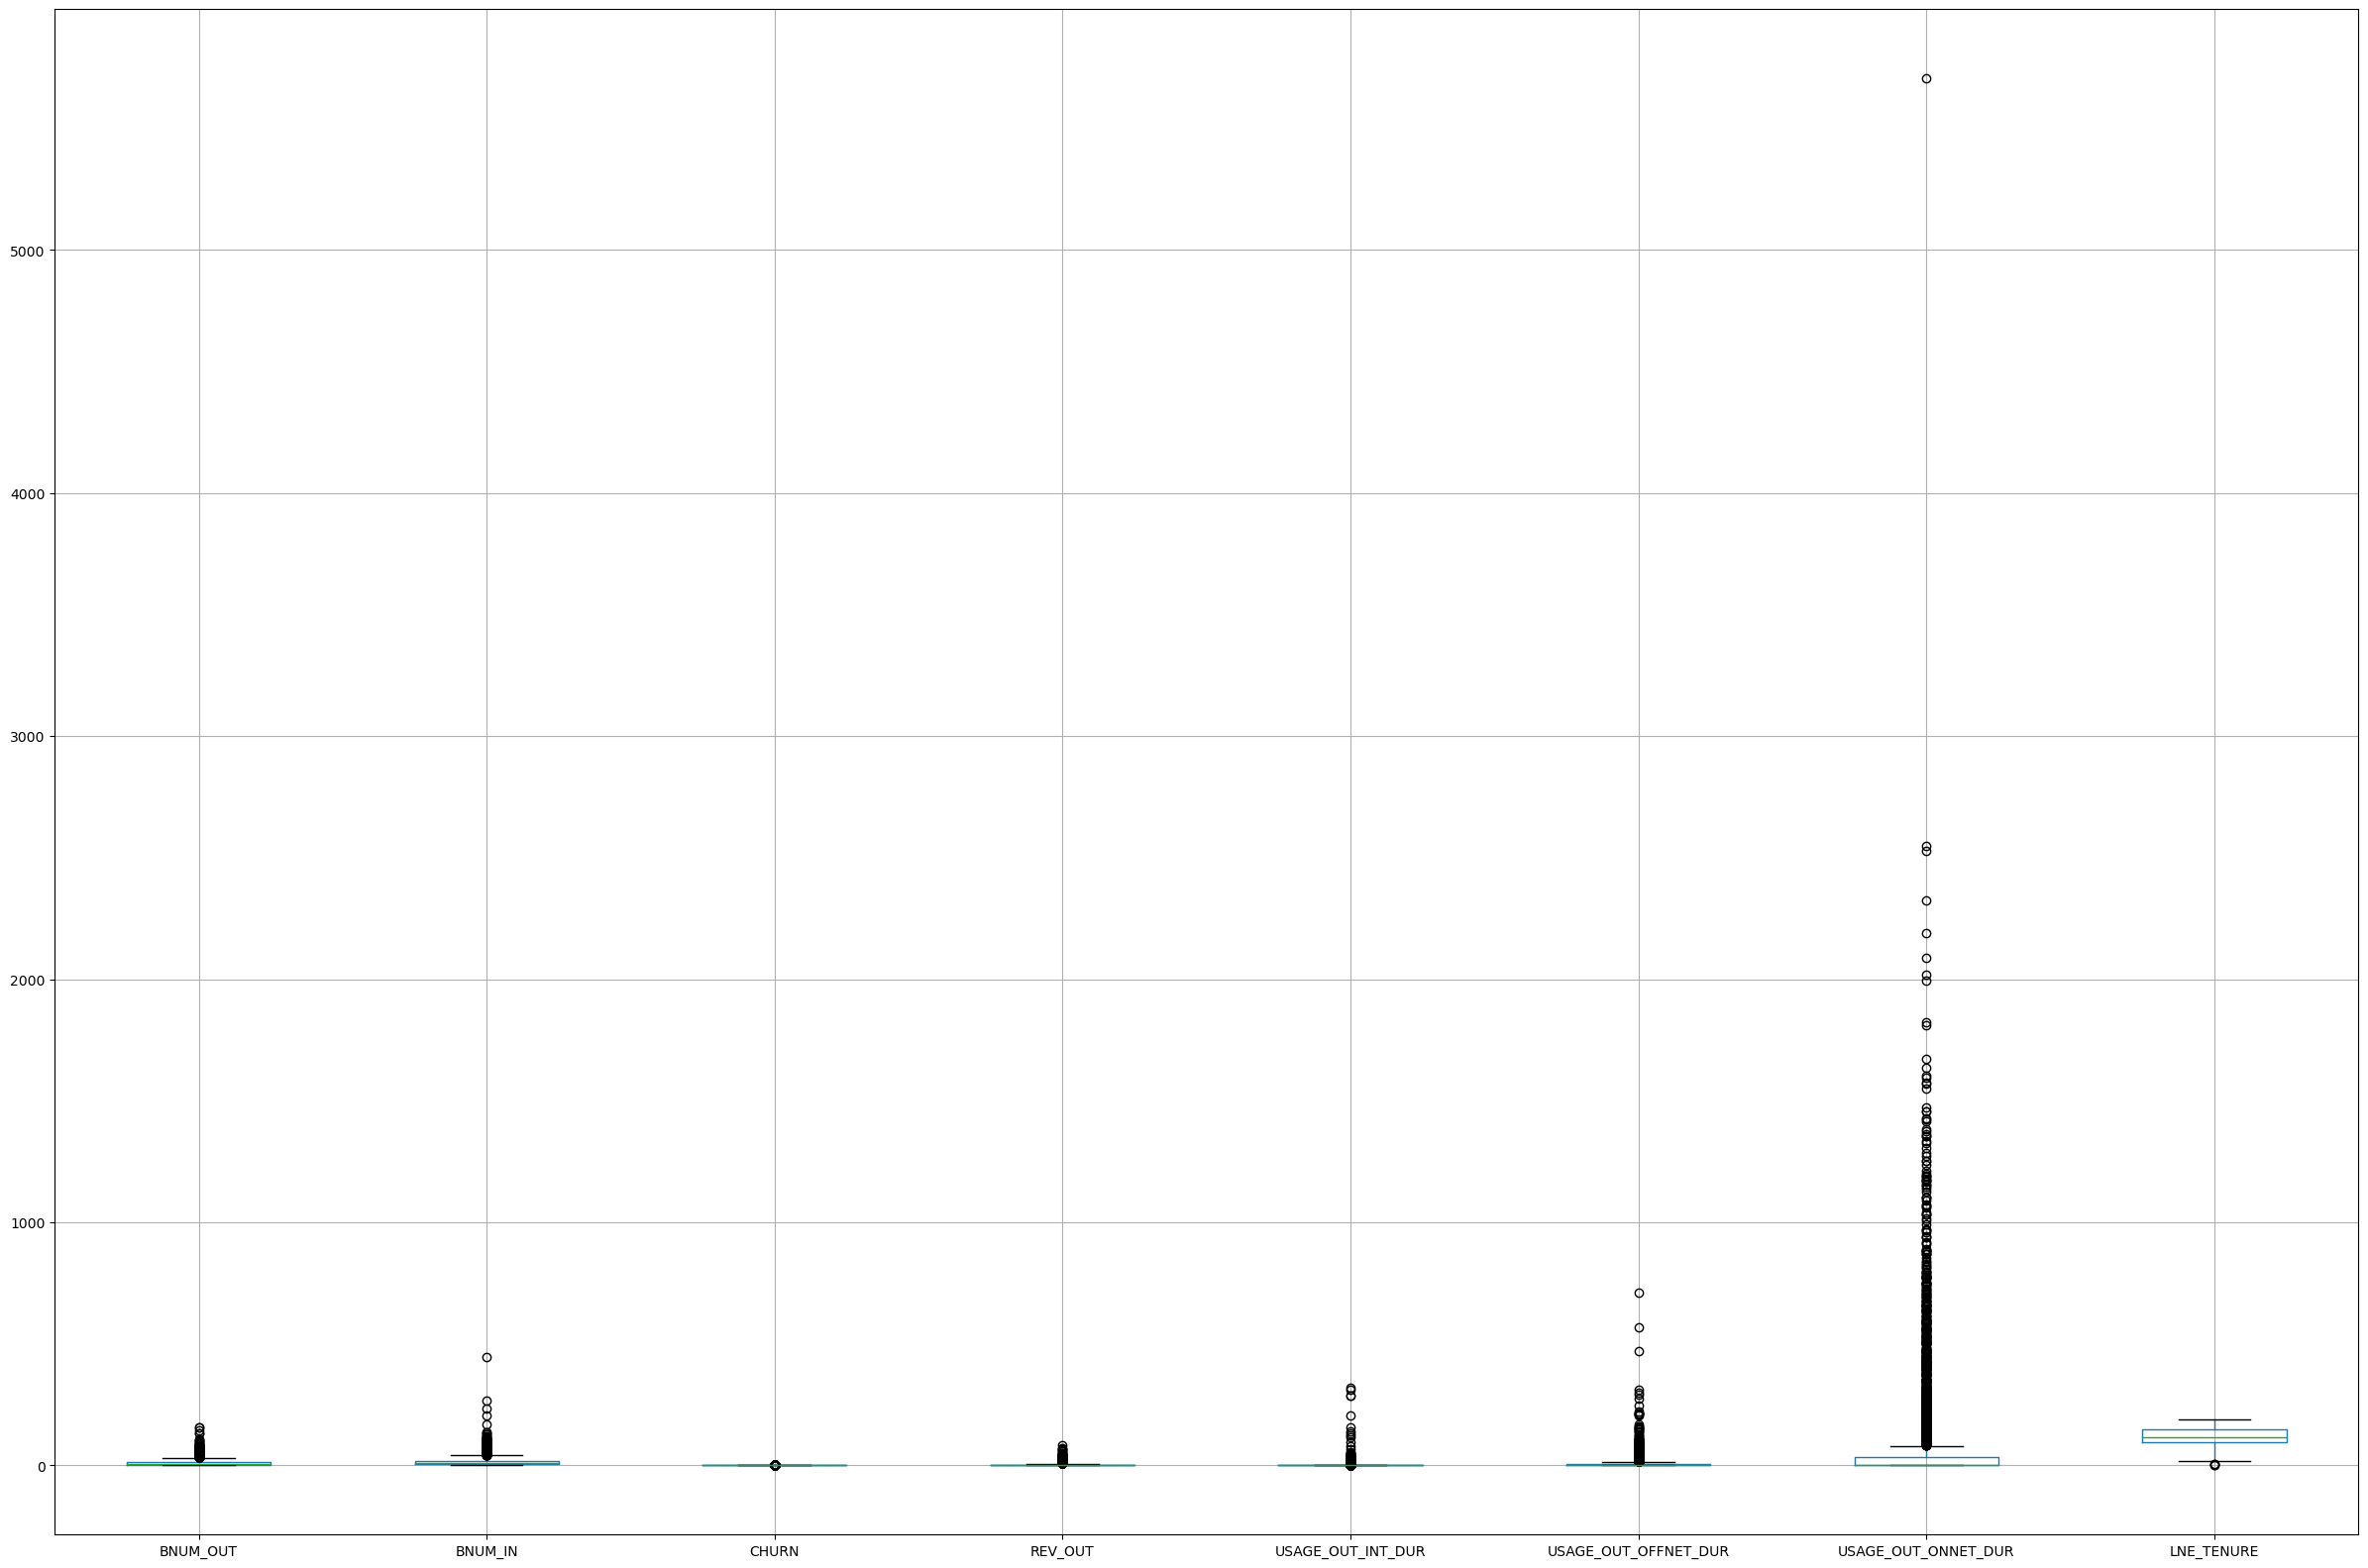

In [24]:
data.boxplot(figsize = (30,20))
# Variable USAGE_OUT_ONNET_DUR has the most outliers by far
# Number of outgoing minutes in the network that customer makes can differ drastically, as well as the number of calls to
# competitor network provider and international calls that customer has made

# LN_TENURE has only three outlier, meaning user tenure is constant and reliable, and CHURN has only 1

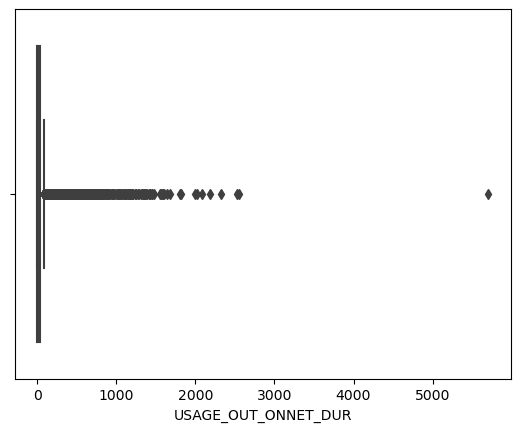

In [25]:
import seaborn as sn
sn.boxplot(x = data['USAGE_OUT_ONNET_DUR'])
plt.show()

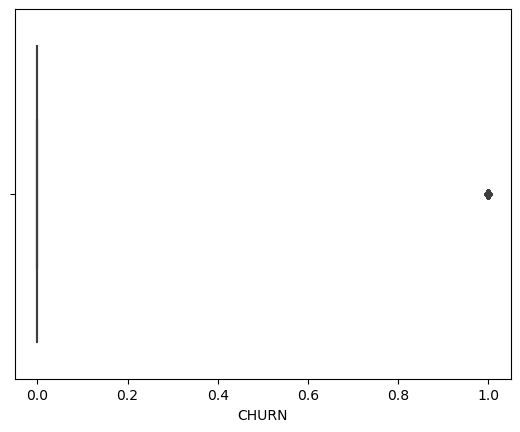

In [26]:
sn.boxplot(x = data['CHURN'])
plt.show()

In [27]:
# grouping data by variable Segment
data_group = data.groupby('Segment').mean().transpose()
data_group

Segment,Segment 1,Segment 2,Segment 3,Segment 5
BNUM_OUT,4.464634,22.021600,4.962982,4.242792
BNUM_IN,6.041038,26.736468,11.666183,10.330334
CHURN,1.000000,0.002843,0.000000,0.001445
REV_OUT,1.359852,5.004975,1.131175,1.512656
USAGE_OUT_INT_DUR,0.473636,2.034826,0.163686,0.537572
USAGE_OUT_OFFNET_DUR,3.790009,16.400142,2.795048,4.485549
USAGE_OUT_ONNET_DUR,19.940823,223.417278,21.258927,11.554501
LNE_TENURE,118.025902,122.583511,113.645117,125.507225


In [28]:
# number of instances (customers) in every segment
segment_counts = data.Segment.value_counts().sort_values(ascending = False)
segment_counts

Segment
Segment 2    1407
Segment 5    1384
Segment 1    1081
Segment 3     727
Name: count, dtype: int64

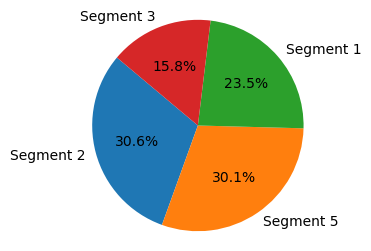

In [58]:
# Pie chart for number of instances in every segment
segment_counts = data['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Count']

plt.figure(figsize=(3, 3))
plt.pie(segment_counts['Count'], labels=segment_counts['Segment'], autopct='%1.1f%%', startangle=140)

plt.axis('equal') 
# plt.title('')

plt.show()

In [29]:
# print(len(data[(data['CHURN'] == 1) & ((data['Segment'] == 'Segment 2') | (data['Segment'] == 'Segment 5'))]))

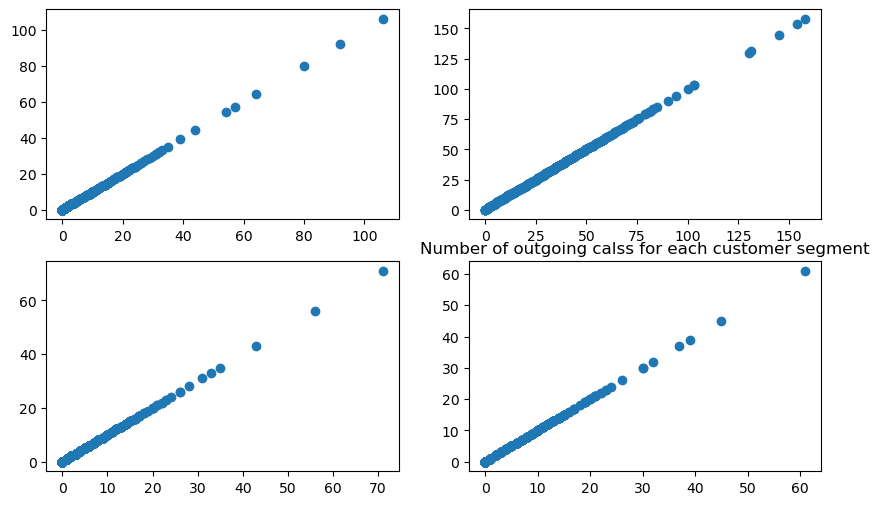

In [30]:
plt.figure(figsize=(10, 6))
i = 1
for segment_category in data['Segment'].unique():
    plt.subplot(2, 2, i)
    i += 1
    segment_data = data[data['Segment'] == segment_category]
    plt.scatter(segment_data['BNUM_OUT'], segment_data['BNUM_OUT'], label=segment_category)

plt.title('Number of outgoing calss for each customer segment')
plt.show()

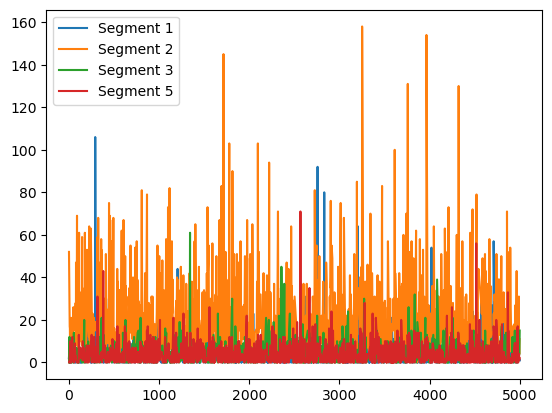

In [31]:
data_group = data.groupby('Segment')

for segment_category, segment_group in data_group:
    plt.plot(segment_group['BNUM_OUT'], label=segment_category)
plt.legend()
    
plt.show()

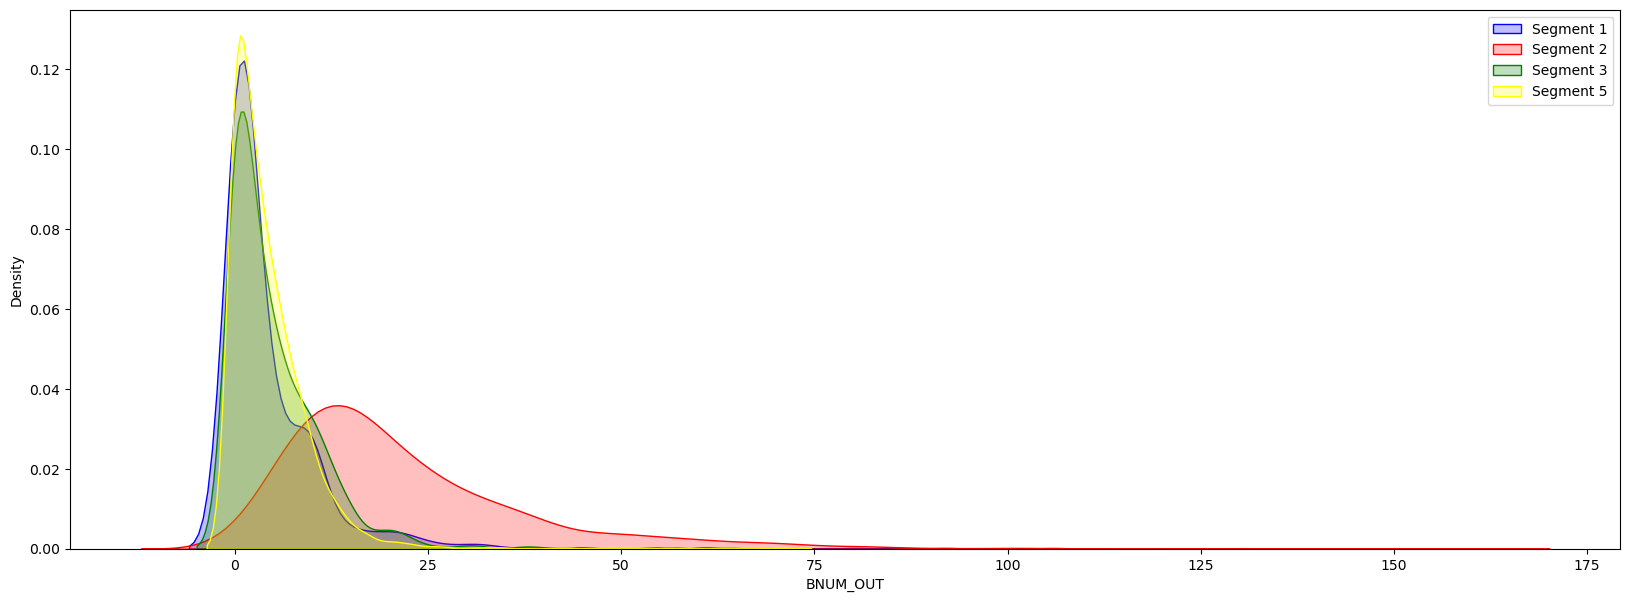

In [32]:
plt.figure(figsize = (20,7))

sn.kdeplot(data=data[data['Segment'] == 'Segment 1']['BNUM_OUT'], label='Segment 1', fill=True, color = 'blue')
sn.kdeplot(data=data[data['Segment'] == 'Segment 2']['BNUM_OUT'], label='Segment 2', fill=True, color = 'red')
sn.kdeplot(data=data[data['Segment'] == 'Segment 3']['BNUM_OUT'], label='Segment 3', fill=True, color = 'green')
sn.kdeplot(data=data[data['Segment'] == 'Segment 5']['BNUM_OUT'], label='Segment 5', fill=True, color = 'yellow')

plt.legend()
plt.show()

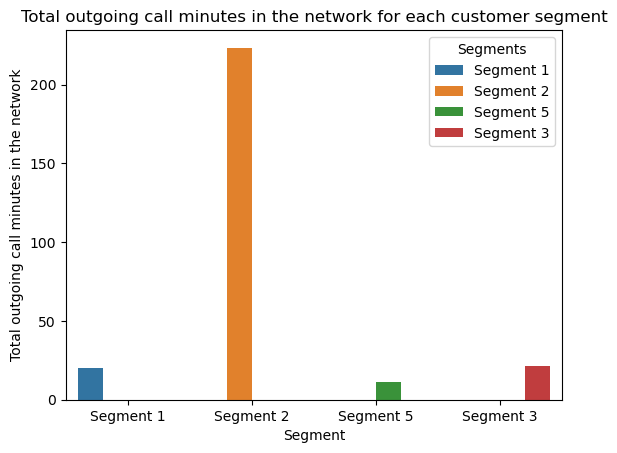

In [33]:
# plotting histogram plot for variable USAGE_OUT_ONNET_DUR for each customer segment
sn.barplot(data=data, x='Segment', y='USAGE_OUT_ONNET_DUR',errorbar=None, hue = 'Segment')
plt.ylabel('Total outgoing call minutes in the network')
plt.legend(title = 'Segments')
plt.title('Total outgoing call minutes in the network for each customer segment')

plt.show()

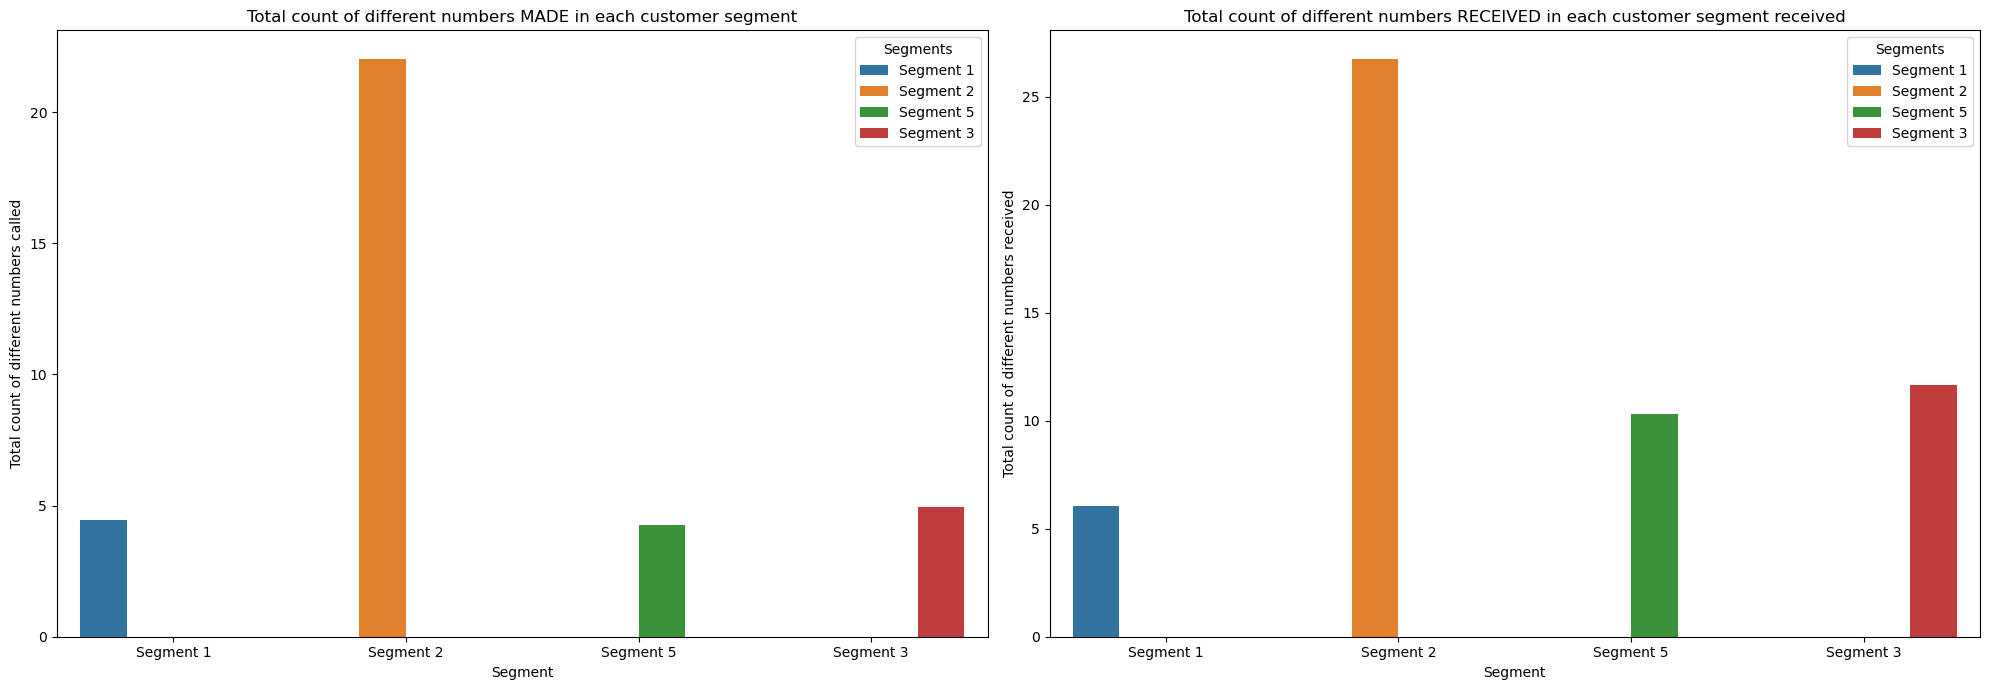

In [56]:
# Bar charts illustrating the count of distinct phone numbers customers in each segment have made and have received
# plt.subplot(1, 2, 1)
import matplotlib.gridspec as gridspec
plt.figure(figsize = (20,7))

gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

ax1 = plt.subplot(gs[0])
sn.barplot(data=data, x='Segment', y='BNUM_OUT',errorbar=None, hue = 'Segment', ax = ax1, linewidth=2)
ax1.set_ylabel('Total count of different numbers called')
ax1.legend(title = 'Segments')
ax1.set_title('Total count of different numbers MADE in each customer segment')
# received
# plt.subplot(1, 2, 2)

ax2 = plt.subplot(gs[1])
sn.barplot(data=data, x='Segment', y='BNUM_IN',errorbar=None, hue = 'Segment', ax = ax2, linewidth=2)
ax2.set_ylabel('Total count of different numbers received')
ax2.legend(title = 'Segments')
ax2.set_title('Total count of different numbers RECEIVED in each customer segment received')

# ax1.remove()

# to prevent overlapping
plt.tight_layout() 

plt.show()

In [61]:
# print(data['CHURN'].value_counts())
percentage_churn = data['CHURN'].value_counts()/len(data) * 100

for index, value in percentage_churn.items():
    print(f'{index}: {value:.2f}%')


0: 76.36%
1: 23.64%
